# Setup and Installation

In [1]:
pip install opencv-python-headless pytesseract pandas

Note: you may need to restart the kernel to use updated packages.


# Image Preprocessing

In [2]:
import cv2
import numpy as np
import pytesseract
import pandas as pd
from matplotlib import pyplot as plt
import os
import re

In [3]:
# Set the path to the Tesseract OCR executable
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR'

In [4]:
def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded. Please check the path.")

In [5]:
image = cv2.imread('id_card.jpg')

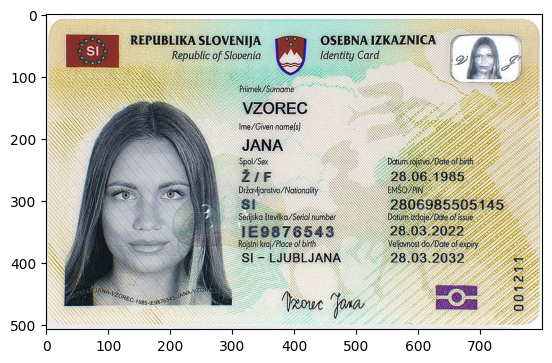

In [6]:
plt.imshow(image)

In [7]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

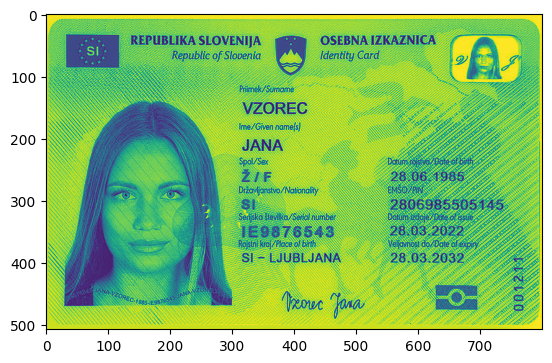

In [8]:
plt.imshow(gray)

In [9]:
# Apply Gaussian blur to reduce noise and improve contour detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [10]:
 # Perform edge detection
edges = cv2.Canny(blurred, 50, 150)

In [11]:
# Find contours
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [12]:
# Sort contours based on area and grab the largest one
contours = sorted(contours, key=cv2.contourArea, reverse=True)
id_card_contour = contours[0]

In [13]:
# Get the bounding box of the largest contour
x, y, w, h = cv2.boundingRect(id_card_contour)

In [14]:
# Extract the ID card from the image
id_card = image[y:y+h, x:x+w]

In [15]:
# Adjust perspective if needed (this is a simple example, you may need more complex transformation)
id_card_gray = cv2.cvtColor(id_card, cv2.COLOR_BGR2GRAY)
id_card_thresh = cv2.threshold(id_card_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

In [16]:
# Save the preprocessed image
cv2.imwrite('preprocessed_image.jpg', id_card_thresh)

True

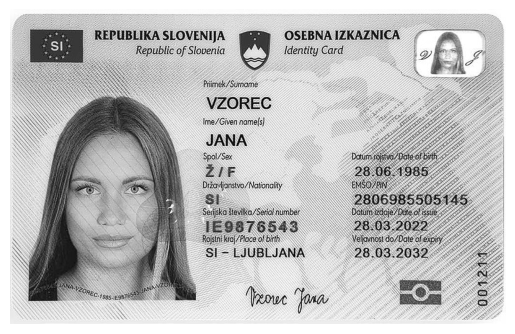

In [17]:
# Display the preprocessed image using matplotlib
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

# Text Recognition with Tesseract OCR

In [18]:
def extract_text_from_image(image_path):
    try:
        # Read the image using OpenCV
        img = cv2.imread('id_card.jpg')

        # Preprocess the image (grayscale, noise reduction, etc.)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Apply additional preprocessing steps as needed

        # Use Tesseract OCR to extract text
        text = pytesseract.image_to_string(gray, lang='eng')

        return text.strip()  # Remove leading/trailing whitespace
    except Exception as e:
        return str(e)

# Data Structuring

In [32]:
def text_to_dataframe(text):
    data = {
        'Field': [],
        'Value': []
    }
    
    lines = text.split('\n')
    
    for line in lines:
        if not line.strip():
            continue
            
        # Use regular expressions to extract fields and values
        match = re.match(r'(\w+)\s+(.+)', line)
        if match:
            field, value = match.groups()
            data['Field'].append(field.strip())
            data['Value'].append(value.strip())
    
    df = pd.DataFrame(data)
    return df

In [20]:
def ID_Recognition() :
    df = pd.DataFrame()
    while True:
        # Ask the user to enter the path of an the image
        image_path = input("Enter the path of the image (or 'exit' to quit): ")

        if image_path.lower() == 'exit':
            break

        # Check if the file exists
        if not os.path.isfile(image_path):
            print("Error: The specified file does not exist. Please try again.")
            continue

        # Extract text from the image
        extracted_text = extract_text_from_image(image_path)

        # Check if text was successfully extracted
        if extracted_text:
            # Print the extracted text
            print("Extracted Text:")
            print(extracted_text)
            df = text_to_dataframe(extracted_text)
            break
        else:
            print("No text detected in the image. Please try another image.")
    return df

# Testing and Validation

In [21]:
def test_system():
    # Test the system with a variety of national ID card images
    test_image_paths = [
        'C:/Users/HP/Downloads/id_card.jpg',
        'C:/Users/HP/Downloads/id_card.jpg',
        'C:/Users/HP/Downloads/id_card.jpg',
        'C:/Users/HP/Downloads/id_card.jpg',
        # Add more test image paths as needed
    ]
    
    for image_path in test_image_paths:
        print(f"Testing image: {image_path}")
        
        # Extract text from the image
        extracted_text = extract_text_from_image(image_path)
        
        if extracted_text:
            # Print the extracted text
            print("Extracted Text:")
            print(extracted_text)
        else:
            print("No text detected in the image.")

In [22]:
def validate_system():
    # Validate the system against known information
    known_info = {
        'path/to/ID_card1.jpg': {
            'Field1': 'Value1',
            'Field2': 'Value2',
            # Add more known information for each ID card
        },
        'path/to/ID_card2.jpg': {
            'Field1': 'Value1',
            'Field2': 'Value2',
            # Add more known information for each ID card
        },
        # Add more ID card paths and known information as needed
    }
    
    for image_path, expected_info in known_info.items():
        print(f"Validating image: {image_path}")
        
        # Extract text from the image
        extracted_text = extract_text_from_image(image_path)
        
        if extracted_text:
            # Convert the extracted text to a dataframe
            df = text_to_dataframe(extracted_text)
            
            # Compare the extracted information with the expected information
            for field, value in expected_info.items():
                if field not in df['Field'].values or value not in df[df['Field'] == field]['Value'].values:
                    print(f"Validation failed for {field}: Expected '{value}', found '{df[df['Field'] == field]['Value'].values}'")
                else:
                    print(f"Validation passed for {field}: '{value}'")
        else:
            print("No text detected in the image.")

# Documentation and Sample Uploads

In [23]:
def create_documentation():
    # Create a document that outlines the project process, methodologies, and testing procedures
    documentation = """
    Project Documentation:
    
    - Project Process:
        - Preprocessing: Convert the image to grayscale, apply noise reduction, and extract the ID card region.
        - Text Recognition: Use Tesseract OCR to extract text from the ID card region.
        - Data Structuring: Convert the extracted text into a structured dataframe.
    
    - Methodologies:
        - Preprocess Image: preprocess_image(image_path)
        - Extract Text from Image: extract_text_from_image(image_path)
        - Convert Text to Dataframe: text_to_dataframe(text)
        - ID Recognition: ID_Recognition()
    
    - Testing Procedures:
        - Test the system with a variety of national ID card images using test_system()
        - Validate the system against known information using validate_system()
    
    - Sample Uploads:
        - Sample ID card images:
            - ![ID Card 1](path/to/ID_card1.jpg)
            - ![ID Card 2](path/to/ID_card2.jpg)
        - Output of structured data for each sample image:
            - ID Card 1:
                - Field1: Value1
                - Field2: Value2
            - ID Card 2:
                - Field1: Value1
                - Field2: Value2
    """
    
    # Save the documentation to a file or display it as needed
    
    print(documentation)

In [24]:
# Perform testing and validation
test_system()
validate_system()

# Create documentation
create_documentation()

Testing image: C:/Users/HP/Downloads/id_card.jpg
Extracted Text:
[WinError 5] Access is denied
Testing image: C:/Users/HP/Downloads/id_card.jpg
Extracted Text:
[WinError 5] Access is denied
Testing image: C:/Users/HP/Downloads/id_card.jpg
Extracted Text:
[WinError 5] Access is denied
Testing image: C:/Users/HP/Downloads/id_card.jpg
Extracted Text:
[WinError 5] Access is denied
Validating image: path/to/ID_card1.jpg
Validation failed for Field1: Expected 'Value1', found '[]'
Validation failed for Field2: Expected 'Value2', found '[]'
Validating image: path/to/ID_card2.jpg
Validation failed for Field1: Expected 'Value1', found '[]'
Validation failed for Field2: Expected 'Value2', found '[]'

    Project Documentation:
    
    - Project Process:
        - Preprocessing: Convert the image to grayscale, apply noise reduction, and extract the ID card region.
        - Text Recognition: Use Tesseract OCR to extract text from the ID card region.
        - Data Structuring: Convert the extract